In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

!nvidia-smi

Thu Jul 11 00:55:20 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| 32%   28C    P8    25W / 350W |      1MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:23:00.0 Off |                  N/A |
| 35%   

In [2]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler, DPMSolverSDEScheduler

pipe = StableDiffusionPipeline.from_single_file("/data/sd_files/checkpoint/beautifulRealistic_v7.safetensors",
                                                torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
pipe.scheduler = DPMSolverSDEScheduler.from_config(pipe.scheduler.config)

pipe.load_textual_inversion('/data/sd_results/shark_inversion/shark_inversion-step00002000.safetensors', token="mychar4")

print('done')

2024-07-11 00:55:23.422902: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 00:55:24.149225: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


done


/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/diffusers/configuration_utils.py:139: FutureWarning: Accessing config attribute `use_karras_sigmas` directly via 'DPMSolverSDEScheduler' object attribute is deprecated. Please access 'use_karras_sigmas' over 'DPMSolverSDEScheduler's config object instead, e.g. 'scheduler.config.use_karras_sigmas'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


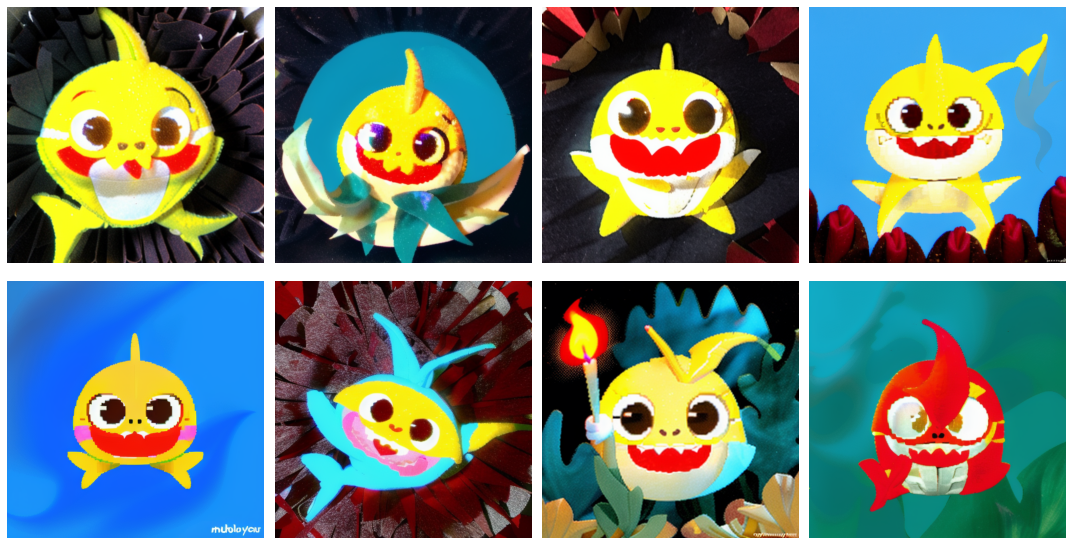

In [5]:
prompt = "mychar4 is swimming in the fire"

images = pipe(prompt=prompt,
         height=512,
         width=512,
         num_inference_steps=20,
         guidance_scale=7,
         num_images_per_prompt=8
        ).images


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()
